In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, balanced_accuracy_score, f1_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE
import lightgbm


In [2]:
features = pd.read_csv('/Users/seibi/projects/ms_driams/cipro_x.csv')
outcome = pd.read_csv('/Users/seibi/projects/ms_driams/cipro_y.csv')

In [ ]:
# No SMOTE, No Feature Selection
print("No SMOTE, No Feature Selection...")
regular_roc = []
regular_acc = []
regular_fs_f1 = []
for i in np.arange(1,10,1):
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = i)
    fold_count = 1
    for train_index, test_index in skf.split(features, outcome):
        print(f"Evaluating Fold {fold_count}/5...")
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = outcome.iloc[train_index], outcome.iloc[test_index]
        reg_lightgbm = lightgbm.LGBMClassifier(objective="binary", seed=42, boosting_type='gbdt', learning_rate=0.01, n_estimators=25, min_child_samples=1)
        _ = reg_lightgbm.fit(X_train, y_train)#, eval_set = (features_val, outcome_val), callbacks = [lightgbm.early_stopping(50)])
        #y_pred = reg_lightgbm.predict(X_test)
        y_prob = reg_lightgbm.predict_proba(X_test)[:,1]
        regular_roc.append(roc_auc_score(y_test, y_prob))
        #regular_acc.append(accuracy_score(y_test, y_pred))
        #regular_fs_f1.append(f1_score(y_test, y_pred))
        # print("ROC:", roc_auc_score(y_test, y_pred))
        # print("ACC:", accuracy_score(y_test, y_pred))
        # print("F1:", f1_score(y_test, y_pred))
        fold_count += 1

(array([1., 1., 0., 0., 0., 0., 0., 2., 1., 1., 0., 0., 1., 2., 1., 0., 2.,
        1., 1., 0., 1., 0., 1., 1., 3., 0., 2., 0., 0., 4., 2., 0., 2., 1.,
        0., 0., 4., 3., 0., 0., 0., 2., 1., 1., 0., 0., 0., 1., 0., 2.]),
 array([0.70957251, 0.71165816, 0.71374381, 0.71582946, 0.7179151 ,
        0.72000075, 0.7220864 , 0.72417205, 0.72625769, 0.72834334,
        0.73042899, 0.73251464, 0.73460028, 0.73668593, 0.73877158,
        0.74085723, 0.74294288, 0.74502852, 0.74711417, 0.74919982,
        0.75128547, 0.75337111, 0.75545676, 0.75754241, 0.75962806,
        0.7617137 , 0.76379935, 0.765885  , 0.76797065, 0.77005629,
        0.77214194, 0.77422759, 0.77631324, 0.77839888, 0.78048453,
        0.78257018, 0.78465583, 0.78674148, 0.78882712, 0.79091277,
        0.79299842, 0.79508407, 0.79716971, 0.79925536, 0.80134101,
        0.80342666, 0.8055123 , 0.80759795, 0.8096836 , 0.81176925,
        0.81385489]),
 <BarContainer object of 50 artists>)

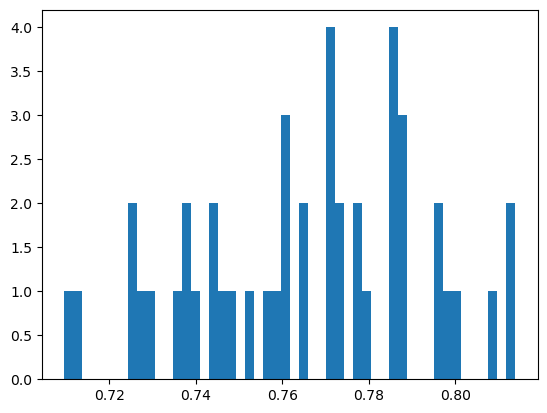

In [11]:
plt.hist(regular_roc, bins =50)

In [15]:
import numpy as np
import pandas as pd
df = np.array([[0.730875576036866, 0.765345622119815, 0.749308755760368, 0.767281105990783, 0.750138248847926, 0.774101382488479],
               [0.716138908605511, 0.743595923426525, 0.704066499538197, 0.712497219073448, 0.667710779786251, 0.709475278887205],
               [0.551621522019532, 0.659311334817895, 0.598304772434125, 0.686843559977888, 0.620692832135618, 0.768933112216694],
               [0.746887966804979, 0.783858921,       0.630000000000000, 0.677000000000000, 0.750138248847926, 0.774101382488479],
               [0.713062524890481, 0.722974093986459, 0.515000000000000, 0.640000000000000, 0.667710779786251, 0.709475278887205],
               [0.709235209235209, 0.715000000000000, 0.610000000000000, 0.729235642135642, 0.620692832135618, 0.768933112216694],
               [0.765304997550220, 0.726188140000000, 0.754011750000000, 0.745302550000000, 0.708096283470410, 0.750011576396499],
               [0.567330488383120, 0.607746020000000, 0.548545200000000, 0.566171430000000, 0.500000000000000, 0.615594100888218],
               [0.839851169858544, 0.813298080000000, 0.808806740000000, 0.820699900000000, 0.765265466917360, 0.821100298138043]],
              dtype='f')


base = df[:, 0].reshape(-1, 1)
df = (df - base) / base

df

array([[ 0.        ,  0.04716272,  0.02522073,  0.04981089,  0.02635561,
         0.05914252],
       [ 0.        ,  0.03834033, -0.0168576 , -0.00508514, -0.06762392,
        -0.00930493],
       [ 0.        ,  0.19522418,  0.08462914,  0.24513562,  0.12521513,
         0.3939506 ],
       [ 0.        ,  0.04949994, -0.15650003, -0.09357226,  0.00435171,
         0.03643571],
       [ 0.        ,  0.01390004, -0.27776322, -0.10246302, -0.06360136,
        -0.00503076],
       [ 0.        ,  0.00812817, -0.13991858,  0.02820004, -0.124842  ,
         0.08417226],
       [ 0.        , -0.05111277, -0.01475651, -0.02613654, -0.07475284,
        -0.01998343],
       [ 0.        ,  0.07123806, -0.03311174, -0.00204303, -0.11867947,
         0.08507142],
       [ 0.        , -0.03161636, -0.0369642 , -0.02280317, -0.08880821,
        -0.02232639]], dtype=float32)

In [17]:
data = pd.DataFrame(df,
columns = ['Base','SMOTE','FS','SMOTE\n+FS','CNN','CNN\n+SMOTE'],
index = ['Ecoli-ceftriaxone','Ecoli-ciprofloxacin','Ecoli-cefepime','Kpneu-ceftriaxone',"Kpneu-ciprofloxacin",'Kpneu-cefepime','Saureus-ciprofloxacin','Saureus-fusidic',"Saureus-oxacillin"])

data

,Base,SMOTE,FS,SMOTE\n+FS,CNN,CNN\n+SMOTE
Ecoli-ceftriaxone,0.0,0.047163,0.025221,0.049811,0.026356,0.059143
Ecoli-ciprofloxacin,0.0,0.038340,-0.016858,-0.005085,-0.067624,-0.009305
Ecoli-cefepime,0.0,0.195224,0.084629,0.245136,0.125215,0.393951
Kpneu-ceftriaxone,0.0,0.049500,-0.156500,-0.093572,0.004352,0.036436
Kpneu-ciprofloxacin,0.0,0.013900,-0.277763,-0.102463,-0.063601,-0.005031
Kpneu-cefepime,0.0,0.008128,-0.139919,0.028200,-0.124842,0.084172
Saureus-ciprofloxacin,0.0,-0.051113,-0.014757,-0.026137,-0.074753,-0.019983
Saureus-fusidic,0.0,0.071238,-0.033112,-0.002043,-0.118679,0.085071
Saureus-oxacillin,0.0,-0.031616,-0.036964,-0.022803,-0.088808,-0.022326


In [13]:
# normalize by row
t_data = data.T
max_ = t_data.max()
max_
t_data /= max_
t_data
# return
t_t_data = t_data.T
t_t_data['drug'] = ['ceft','cipro','cefe','ceft','cipro','cefe','cipro','fus','oxa']
t_t_data['patho']=['ecoli','ecoli','ecoli','K','K','K',"S",'S','S']
t_t_data

,Base,SMOTE,FS,SMOTE\n+FS,CNN,CNN\n+SMOTE,drug,patho
Ecoli-ceftriaxone,0.944160,0.988689,0.967972,0.991189,0.969044,1.000000,ceft,ecoli
Ecoli-ciprofloxacin,0.963075,1.000000,0.946840,0.958178,0.897948,0.954114,cipro,ecoli
Ecoli-cefepime,0.717386,0.857437,0.778097,0.893242,0.807213,1.000000,cefe,ecoli
Kpneu-ceftriaxone,0.952835,1.000000,0.803716,0.863676,0.956981,0.987552,ceft,K
Kpneu-ciprofloxacin,0.986291,1.000000,0.712335,0.885232,0.923561,0.981329,cipro,K
Kpneu-cefepime,0.922363,0.929860,0.793307,0.948373,0.807213,1.000000,cefe,K
Saureus-ciprofloxacin,1.000000,0.948887,0.985243,0.973863,0.925247,0.980017,cipro,S
Saureus-fusidic,0.921598,0.987251,0.891083,0.919715,0.812223,1.000000,fus,S
Saureus-oxacillin,1.000000,0.968384,0.963036,0.977197,0.911192,0.977674,oxa,S


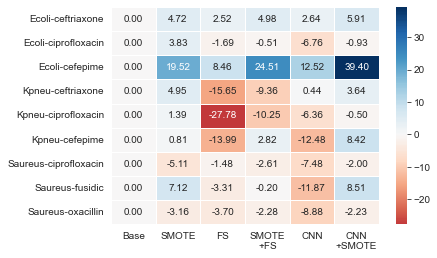

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare a vector of color mapped to the 'cyl' column
#colored_column = t_t_data['patho']
#my_palette = dict(zip(colored_column.unique(), ['red','green','blue','orange','purple']))
#row_colors = colored_column.map(my_palette)
sns.heatmap(data*100, linewidths=1, cmap="RdBu", annot=True, fmt=".2f", center=0) #, row_colors=row_colors,)
plt.savefig("results-heatmap.pdf", dpi=300, bbox_inches='tight')

In [35]:
values= pd.DataFrame(t_t_data.median(axis=0), columns=["Median"])
values


/var/folders/kq/0btgds9d0gn_knn21km5_b980000gn/T/ipykernel_55072/2958176124.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  values= pd.DataFrame(t_t_data.median(axis=0), columns=["Median"])


,Median
Base,0.4
SMOTE,0.4
FS,0.6
SMOTE+FS,0.4
CNN,0.6
CNN+SMOTE,0.6


<AxesSubplot:ylabel='Median'>

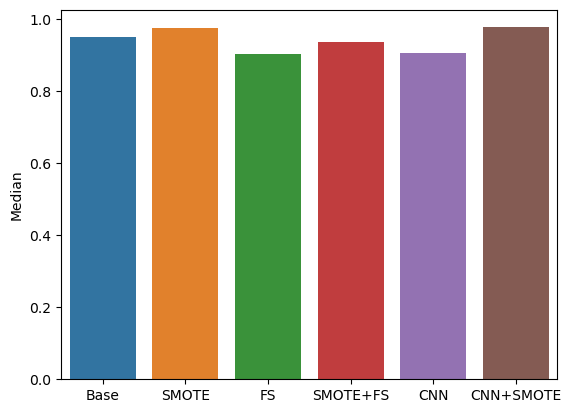

In [98]:

sns.barplot(data=values, x= values.index, y= values['Median'])